In [1]:
# <1> importing the dataset into a variable "ds" as in DataSet

import pandas as pd

ds = pd.read_csv("C://Users//SOHAM//Downloads//in-vehicle-coupon-recommendation.csv")

# Checking if the Dataset is loaded Properly.

ds.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [2]:
# <2> Data Exploration

ds.shape

(12684, 26)

In [3]:
ds.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [4]:
ds.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
# as the car column has 12,576 missing values among 12,684 records, we sill be deleting the column from the dataset.

ds=ds.drop(['car'],axis=1)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
# correcting all the missing values

# Function to replace missing values with mode for multiple columns
def replace_missing_with_mode(df, columns):
    for col in columns:
        mode_value = df[col].mode()[0]  # Calculate mode
        df[col].fillna(mode_value, inplace=True)  # Replace missing values with mode


columns = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

replace_missing_with_mode(ds,columns)

ds.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

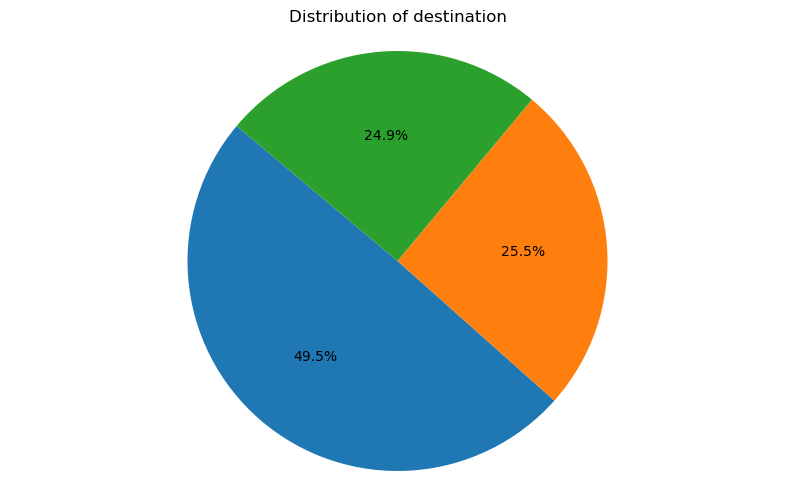

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.pie(ds['destination'].value_counts(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of destination')
plt.axis('equal')
plt.show()

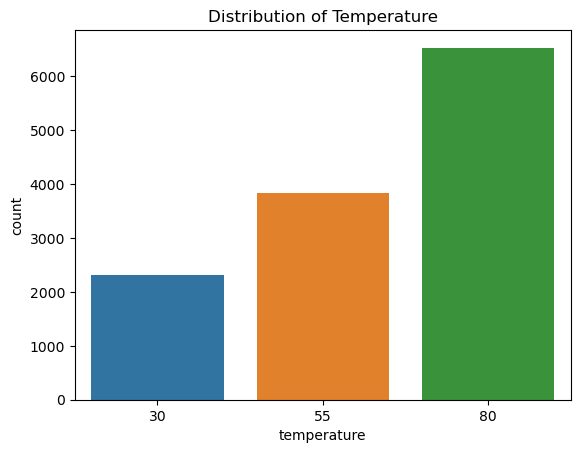

In [8]:
# Creating Bar chart for the 'team' variable

sns.countplot(x='temperature', data=ds)
plt.title('Distribution of Temperature')
plt.show()

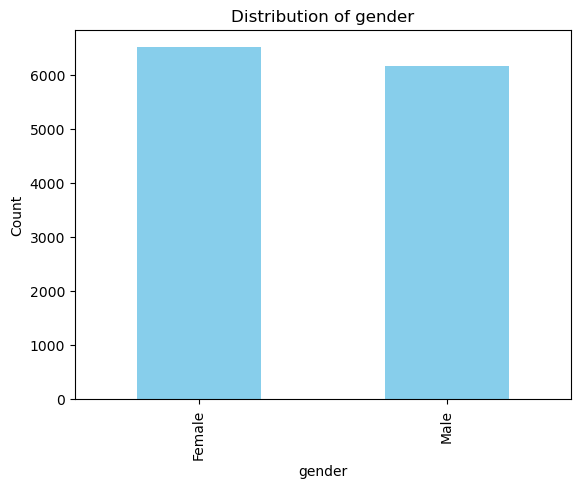

In [9]:
categorical_column = 'gender'
ds[categorical_column].value_counts().plot(kind='bar', color='skyblue')
plt.title(f'Distribution of {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.show()

In [10]:
#Feature Scaling

# Creating the data frame
details = {
    'col1': ds['temperature'],
}
  
# creating a Dataframe object
df = pd.DataFrame(details)

df.head()

,col1
0,55
1,80
2,80
3,80
4,80


In [11]:
# Z-Score using pandas
df = (df - df.mean()) / df.std()

df.head()

,col1
0,-0.433413
1,0.871765
2,0.871765
3,0.871765
4,0.871765


In [12]:
import numpy as np

(df['col1']-np.mean(df['col1']))/np.std(df['col1'])

0       -0.433430
1        0.871799
2        0.871799
3        0.871799
4        0.871799
           ...   
12679   -0.433430
12680   -0.433430
12681   -1.738659
12682   -1.738659
12683    0.871799
Name: col1, Length: 12684, dtype: float64

In [13]:

from sklearn.preprocessing import StandardScaler
  
# Creating the data frame
details = {
    'col1': [1, 3, 5, 7, 9],
    'col2': [7, 4, 35, 14, 56]
}
  
# creating a Dataframe object
df = pd.DataFrame(details)
  
# define standard scaler
scaler = StandardScaler()
  
# transform data
df = scaler.fit_transform(df)

print(df)

[[-1.41421356 -0.82438745]
 [-0.70710678 -0.97705179]
 [ 0.          0.60047975]
 [ 0.70710678 -0.46817065]
 [ 1.41421356  1.66913015]]


In [14]:
df = pd.DataFrame(details)

df1 = scaler.fit(df)
print(df1)

df2 = scaler.transform(df)
print(df2)


StandardScaler()
[[-1.41421356 -0.82438745]
 [-0.70710678 -0.97705179]
 [ 0.          0.60047975]
 [ 0.70710678 -0.46817065]
 [ 1.41421356  1.66913015]]


In [15]:
#label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ds['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [16]:
ds['maritalStatus_Enc'] = ds['maritalStatus'].map({'Married partner':0,'Single':1,'Unmarried partner':2, 'Divorced':3, 'Widowed':4}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,1,2
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,0,0,0,1,0,2
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,1,2
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,1,1,0,0,1,0,2


In [17]:
ds['weather'].value_counts()

ds['weather_Enc'] = ds['weather'].map({'Sunny':0,'Snowy':1,'Rainy':2}).astype(int)

ds.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,1,2,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,0,0,0,1,0,2,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,1,2,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,2,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,4~8,1~3,1,1,0,0,1,0,2,0


In [18]:
ds['age'].value_counts()

ds['age_Enc'] = ds['age'].map({'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 50}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,1,2,0,21
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,0,0,0,1,0,2,0,21
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,1,2,0,21
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,2,0,21
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,1,1,0,0,1,0,2,0,21


In [19]:
ds['income'].value_counts()

ds['income_Enc'] = ds['income'].map({
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}).astype(int)

ds.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,0,0,0,1,1,2,0,21,3
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0,0,1,0,2,0,21,3
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,0,0,1,1,2,0,21,3
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,1,0,0,1,0,2,0,21,3
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,1,0,0,1,0,2,0,21,3


In [20]:
ds['gender'].value_counts()

ds['gender_Enc'] = ds['gender'].map({'Female': 0, 'Male': 1,}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,0,1,1,2,0,21,3,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,0,1,0,2,0,21,3,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,0,0,1,1,2,0,21,3,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,0,1,0,2,0,21,3,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,0,1,0,2,0,21,3,0


In [21]:
ds['destination'].value_counts()

ds['destination_Enc'] = ds['destination'].map({'Home': 0, 'No Urgent Place': 1, 'Work':2}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,toCoupon_GEQ25min,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,0,1,1,2,0,21,3,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,1,0,2,0,21,3,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,0,1,1,2,0,21,3,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,0,1,0,2,0,21,3,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,0,1,0,2,0,21,3,0,1


In [22]:
ds['passanger'].value_counts()

ds['passanger_Enc'] = ds['passanger'].map({'Alone': 0, 'Friend(s)': 1, 'Kid(s)':2, 'Partner':3}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc,passanger_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,1,1,2,0,21,3,0,1,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,2,0,21,3,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,1,1,2,0,21,3,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,1,0,2,0,21,3,0,1,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,1,0,2,0,21,3,0,1,1


In [23]:
ds['time'].value_counts()

ds['time_Enc'] = ds['time'].map({'7AM': 0, '10AM': 1, '2PM':2, '6PM':3, '10PM':4}).astype(int)

ds.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_opp,Y,maritalStatus_Enc,weather_Enc,age_Enc,income_Enc,gender_Enc,destination_Enc,passanger_Enc,time_Enc
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1,1,2,0,21,3,0,1,0,2
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,2,0,21,3,0,1,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,1,1,2,0,21,3,0,1,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1,0,2,0,21,3,0,1,1,2
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1,0,2,0,21,3,0,1,1,2


In [24]:
ds.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
maritalStatus_Enc       0
weather_Enc             0
age_Enc                 0
income_Enc              0
gender_Enc              0
destination_Enc         0
passanger_Enc           0
time_Enc                0
dtype: int64

In [25]:
# Decision Tree

from sklearn.model_selection import train_test_split

y=ds['Y']
x = ds[['maritalStatus_Enc','weather_Enc','age_Enc','income_Enc','temperature','gender_Enc','passanger_Enc','destination_Enc',
        'time_Enc','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp',]]

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y) #70% training part

In [26]:
# Importing Packages

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [27]:
# Creating the Model

ct = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )


In [28]:
ct.fit(X_train,y_train) # Feeding the model with data to Train

DecisionTreeClassifier()

In [29]:
y_pred = ct.predict(X_test) # Now trying to predict the outputs for the X_test data

In [30]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 926,  717],
       [ 901, 1262]], dtype=int64)

In [31]:
accuracy_score(y_test, y_pred) # Checking the Accuracy

0.5748817656332107

In [32]:
precision_score(y_test, y_pred)# Checking the Precision

0.6376958059626073

In [33]:
recall_score(y_test, y_pred)# Checking the Recall

0.5834489135460009

In [34]:
f1_score(y_test, y_pred)# Checking the F1 Score

0.6093674553355867

In [35]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

[Text(0.5, 0.875, 'node #0\npassanger_Enc <= 0.5\ngini = 0.491\nsamples = 8878\nvalue = [3831, 5047]\nclass = Reject'),
 Text(0.25, 0.625, 'node #1\ntoCoupon_GEQ15min <= 0.5\ngini = 0.499\nsamples = 5173\nvalue = [2447, 2726]\nclass = Reject'),
 Text(0.125, 0.375, 'node #2\ntime_Enc <= 2.5\ngini = 0.482\nsamples = 2597\nvalue = [1052, 1545]\nclass = Reject'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #2047\ntemperature <= 67.5\ngini = 0.497\nsamples = 2576\nvalue = [1395, 1181]\nclass = Accept'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #4268\npassanger_Enc <= 1.5\ngini = 0.468\nsamples = 3705\nvalue = [1384, 2321]\nclass = Reject'),
 Text(0.625, 0.375, 'node #4269\nweather_Enc <= 1.5\ngini = 0.445\nsamples = 2290\nvalue = [764, 1526]\nclass = Reject'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #6022\nt

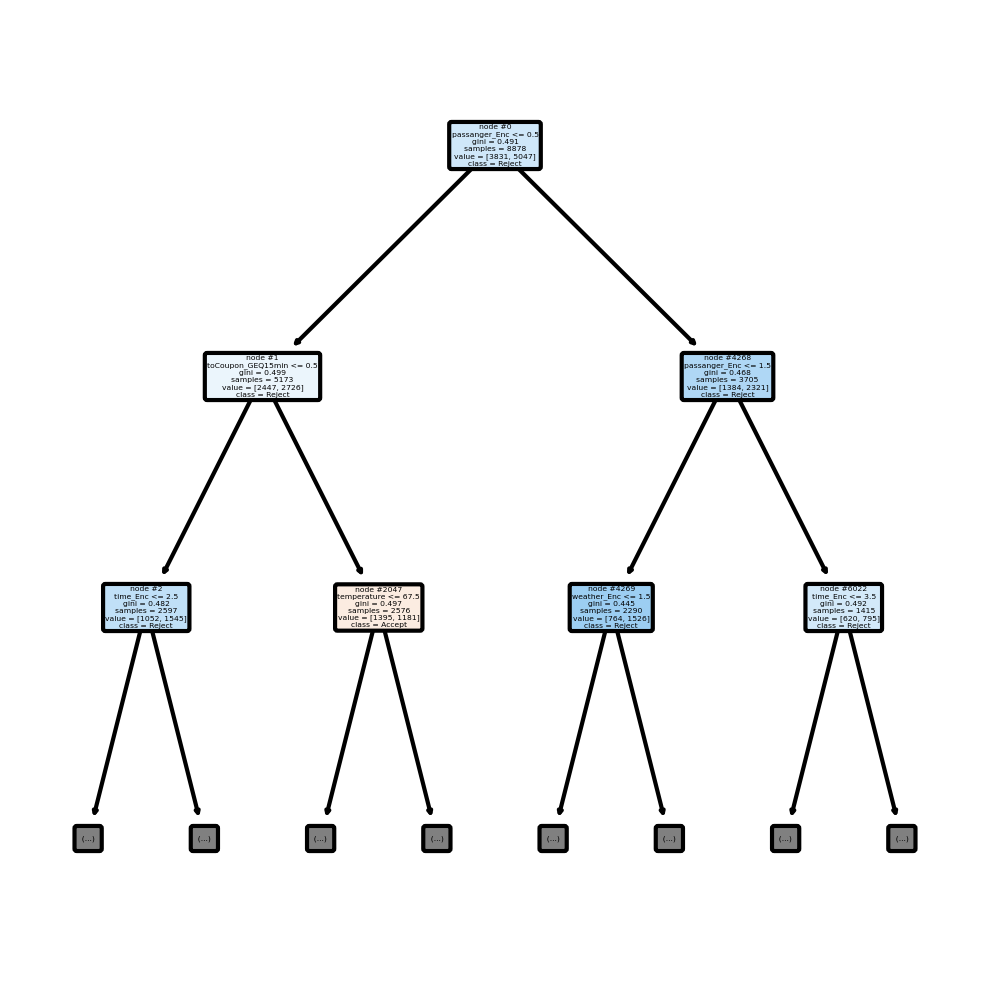

In [36]:
# Creating the Visual Decision Tree model

from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(ct, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['maritalStatus_Enc','weather_Enc','age_Enc','income_Enc','temperature','gender_Enc','passanger_Enc','destination_Enc',
        'time_Enc','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp'],
               
            class_names = ["Accept","Reject"]
              )
#fig.savefig('C://Users//IMI KOLKATA//Desktop//plottreedefault.png')

In [37]:
# kNN
# Importing Packages

from sklearn.neighbors import KNeighborsClassifier


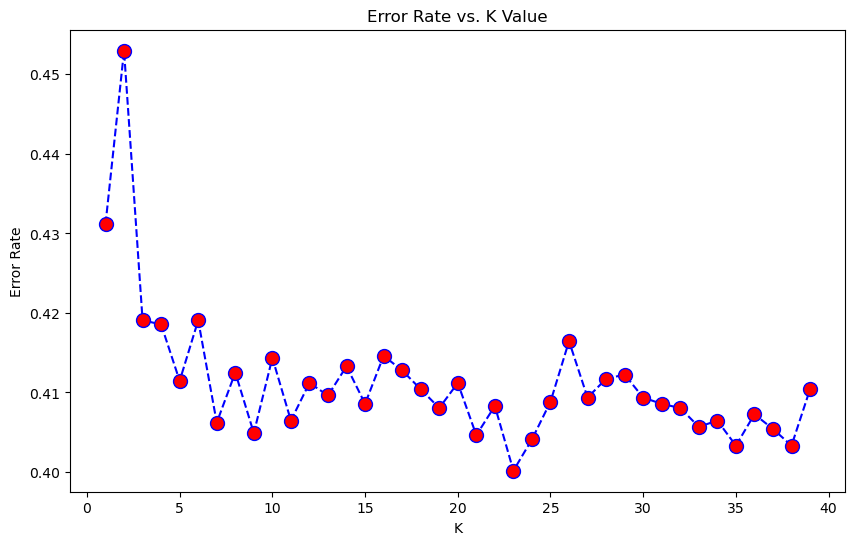

Minimum error:- 0.40015764582238567 at K = 23


In [38]:
# To find out the best k value between 1 to 40 for our dataset

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [39]:
# As we have got the K value as 23 we will be trainning the model according to 23 nearest neighbours.

knn = KNeighborsClassifier(n_neighbors=23, metric='euclidean') # Creating the Model with Euclidean Distance Method

knn.fit(X_train, y_train)# Feeding the model with data to Train

KNeighborsClassifier(metric='euclidean', n_neighbors=23)

In [40]:
y_pred = knn.predict(X_test)  # Now trying to predict the outputs for the X_test data

In [41]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 590, 1053],
       [ 488, 1675]])

In [42]:
accuracy_score(y_test, y_pred)# Checking the Accuracy

0.5951129795060431

In [43]:
precision_score(y_test, y_pred)# Checking the Precision

0.6140029325513197

In [44]:
recall_score(y_test, y_pred)# Checking the Recall

0.7743874248728617

In [45]:
f1_score(y_test, y_pred)# Checking the F1 Score

0.684931506849315

In [46]:
# Random Forest

#Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Creating a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100)

# Feeding the model with data to Train
clf1.fit(X_train,y_train)

# Now trying to predict the outputs for the X_test data
y_pred1=clf1.predict(X_test)

In [47]:
#Importing scikit-learn metrics module for accuracy calculation

from sklearn import metrics

# Calculating the Accuracy and printing it.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6153441933788755


In [48]:
# Creating the Confusion Matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred1)

array([[ 856,  787],
       [ 677, 1486]])

In [49]:
# Printing Classification Report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1643
           1       0.65      0.69      0.67      2163

    accuracy                           0.62      3806
   macro avg       0.61      0.60      0.60      3806
weighted avg       0.61      0.62      0.61      3806



In [50]:
# Calcualting and Printing the Accuracy, Recall and F1 Score

print ("Precision ", precision_score(y_test, y_pred1))
print ("Recall ",recall_score(y_test, y_pred1))
print ("F1 Score ",f1_score(y_test, y_pred1))

Precision  0.6537615486141664
Recall  0.6870087840961627
F1 Score  0.6699729486023445


In [51]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [52]:
# Calculating the Feature Importance

import pandas as pd
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

income_Enc           0.299372
age_Enc              0.243640
maritalStatus_Enc    0.107063
time_Enc             0.080106
temperature          0.059362
passanger_Enc        0.048948
gender_Enc           0.047195
toCoupon_GEQ15min    0.032946
weather_Enc          0.029548
destination_Enc      0.021500
toCoupon_GEQ25min    0.013925
direction_same       0.008547
direction_opp        0.007848
toCoupon_GEQ5min     0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


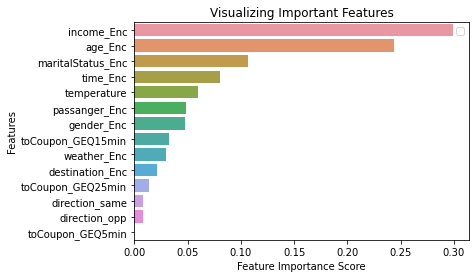

In [53]:
#visualizing feature importance results

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [54]:
!pip install xgboost

In [55]:
# XG Boost

# Importing XG Boost package

import xgboost as xgb

# Creating the Model
model = xgb.XGBClassifier()

# Feeding the model with data to Train
model.fit(X_train, y_train)

# Now trying to predict the outputs for the X_test data
y_pred=model.predict(X_test)

In [56]:
confusion_matrix(y_test, y_pred) # Creating the Confusion Matrix

array([[ 872,  771],
       [ 575, 1588]])

In [57]:
X_train.columns

Index(['maritalStatus_Enc', 'weather_Enc', 'age_Enc', 'income_Enc',
       'temperature', 'gender_Enc', 'passanger_Enc', 'destination_Enc',
       'time_Enc', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [58]:
accuracy_score(y_test, y_pred) # Checking the Accuracy Score

0.6463478717813977

In [59]:
precision_score(y_test, y_pred) # Checking the Precision

0.6731665960152607

In [60]:
recall_score(y_test, y_pred) # Checking the Recall Score

0.73416551086454

In [61]:
f1_score(y_test, y_pred) # Checking the F1 Score

0.70234409553295

In [62]:
#The best model will be selected on the basis of 'F1 SCORE'.
#F1 SCORE FOR DECISION TREE MODEL: 0.6138279932546373
#F1 SCORE FOR RANDOM FOREST MODEL: 0.666214382632293
#F1 SCORE FOR XGBOOST MODEL: 0.70234409553295
#F1 SCORE FOR KNN CLASSIFIER MODEL: 0.684931506849315
#Since the F1 Score is highest for XGBoost Model it is the best Model based on the daatset.